In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from maxima import findLocalMaximaMinima
from scipy.signal import argrelextrema


In [2]:
#extra librarbies
import librosa 
import IPython.display as ipd

In [3]:
#Load a .wav file
x, sr = librosa.load('D:\\Programowanie\\AI\\editor\\data\\samples\\inputs\\africa-toto.wav')
type(x)
print('x length ={}'.format(len(x)))
print('sample rate = {}'.format(sr))

x length =6570432
sample rate = 22050


In [4]:
#confirrm the audio length
print('sound clip is {} seconds long' .format((len(x)/sr)))

sound clip is 297.97877551020406 seconds long


In [5]:
#np.array of seconds
t = np.array(range(0, len(x))) /sr
print(t)

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 2.97978639e+02
 2.97978685e+02 2.97978730e+02]


Text(0, 0.5, 'Pressure')

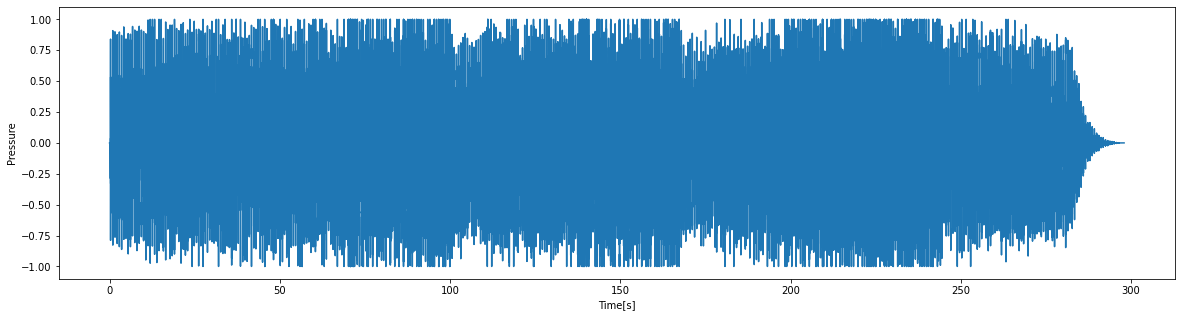

In [6]:
plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.xlabel('Time[s]')
plt.ylabel('Pressure')

In [7]:
# ipd.Audio(x, rate=sr)

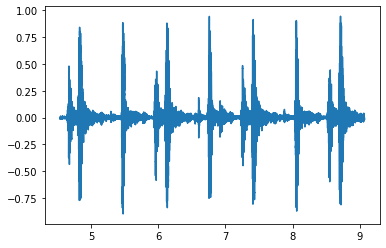

In [8]:
plt.plot(t[100000:200000], x[100000:200000])

In [9]:
fhat = np.fft.fft(x)

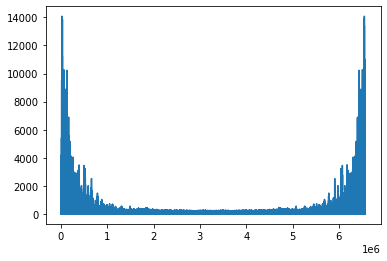

In [10]:
plt.plot(abs(fhat))

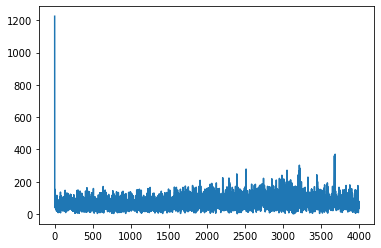

In [11]:
plt.plot(abs(fhat[0:4000]))

In [12]:
#POWER SPECTRUM PSD
PSD = fhat * np.conj(fhat)/len(x)

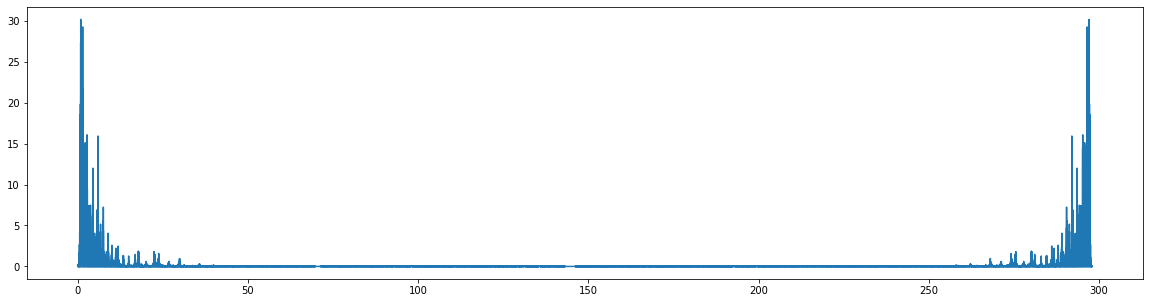

In [13]:
indices = PSD < 100
PSDclean = PSD * indices
fhat_COPY = indices * fhat
ffilt = np.fft.ifft(fhat)
plt.figure(figsize=(20,5))
plt.plot(t,PSDclean)

In [14]:
ffilt_new = np.int16((PSDclean))
# write('first_sine_wave.wav', sr, ffilt_new)

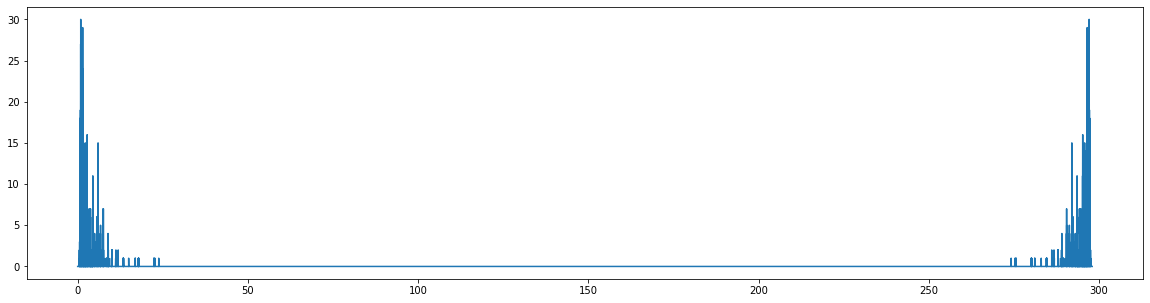

In [15]:
plt.figure(figsize=(20,5))
plt.plot(t,ffilt_new)

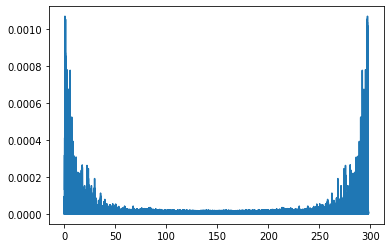

In [16]:
 audio_fft = np.abs((np.fft.fft(x)[0:int(len(x))])/2)/len(x)
 freqs = sr*np.arange(len(x))/len(x)


    # audio_fft = np.abs((np.fft.fft(audio)[0:int(len(audio)/2)])/len(audio))
    # freqs = fs*np.arange(len(audio)/2)/len(audio)

# len(audio_fft)
limit = int(len(x))
plt.plot(t[0:limit],audio_fft[0:limit])

In [17]:
    #indeksy sub_bassowych czestotliwosc
    sub_bass_indices = [(idx,val) for idx,val in enumerate(freqs) if val >= 10 and val <= 60]
    print("\nThe value of first five indices is = {}".format(sub_bass_indices[0:5]))
    local_maximas = findLocalMaximaMinima(len(sub_bass_indices),sub_bass_indices)
    print("\nThe values of first five Local maximas are = {}".format(local_maximas), '\nIts LEN is equal to {}'.format(len(local_maximas)))
    










    # print(local_maximas[0:5])
    # print(audio_fft[local_minmas])
    # print("The length of audio is = {}".format(len(x)))
    # print("filtered sound is {:.1%} of the original".format(len(sub_bass_indices)/len(x)))

    # #maksymalna wartosc
    # # sub_bass = np.max(audio_fft[sub_bass_indices])
    # sub_bass = np.argmax(sub_bass_indices)
    # print(sub_bass)
    # print(sub_bass)
    # # sub_bass = np.max(audio_fft[sub_bass_indices])
    # print(sub_bass)
    # plt.plot(t,sub_bass_indices)




The value of first five indices is = [(2980, 10.000712281932147), (2981, 10.004068225650917), (2982, 10.007424169369685), (2983, 10.010780113088455), (2984, 10.014136056807224)]
[(2980, 10.000712281932147), (197763, 10.000385667182918), (392546, 10.000059052433691), (587330, 10.003088381403233), (782113, 10.002761766654004), (976896, 10.002435151904775), (1171679, 10.002108537155548), (1366462, 10.00178192240632), (1561245, 10.001455307657091), (1756028, 10.001128692907864), (1950811, 10.000802078158635), (2145594, 10.000475463409407), (2340377, 10.00014884866018), (2535161, 10.00317817762972), (2729944, 10.002851562880492), (2924727, 10.002524948131265), (3119510, 10.002198333382037), (3314293, 10.001871718632808), (3509076, 10.001545103883581), (3703859, 10.001218489134352), (3898642, 10.000891874385124), (4093425, 10.000565259635897), (4288208, 10.000238644886668), (4482992, 10.00326797385621), (4677775, 10.00294135910698), (4872558, 10.002614744357754), (5067341, 10.002288129608525

In [18]:
ar = np.zeros(len(x))
print(len(x))
print(ar)
for i,val in enumerate(sub_bass_indices):
    ar[val] = 10

plt.plot(t,ar)


6570432
[0. 0. 0. ... 0. 0. 0.]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

[0. 0. 0. ... 0. 0. 0.]


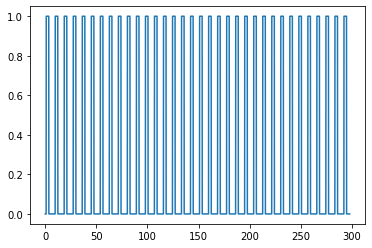

In [73]:
m = np.max(np.abs(ar))
sigf32 = (ar/m).astype(np.float32)
print(ar[0:len(x)])
write("audio_output.wav", sr , sigf32)
plt.plot(t,sigf32)
# plt.plot(t,ar)